In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PowerTransformer
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Veri Yükleme
data = pd.read_csv("tablet.csv")

In [4]:
# Temel Bilgiler
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [6]:
# Eksik verileri doldurma
data["OnKameraMP"] = data["OnKameraMP"].fillna(data["OnKameraMP"].median())
data["RAM"] = data["RAM"].fillna(data["RAM"].median())

In [24]:
# Kategorik Değişkenleri Dönüştürme
le = LabelEncoder()
if "Renk" in data.columns:
    data["Renk"] = le.fit_transform(data["Renk"])
if "FiyatAraligi" in data.columns:
    data["FiyatAraligi"] = le.fit_transform(data["FiyatAraligi"])

In [25]:
print(data.columns)



Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk',
       'RAM_Standardized', 'RAM_Normalized', 'RAM_BoxCox', 'RAM_Log',
       'RAM_Sqrt', 'FiyatAraligi_Num'],
      dtype='object')


In [26]:
# Sayısal Değişkenlerin Histogramları
def hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable].dropna(), bins=20, edgecolor='black')
    plt.ylabel("Frekans")
    plt.title(variable)
    plt.show()


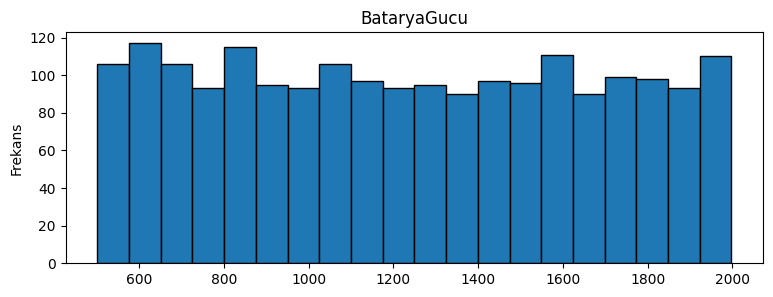

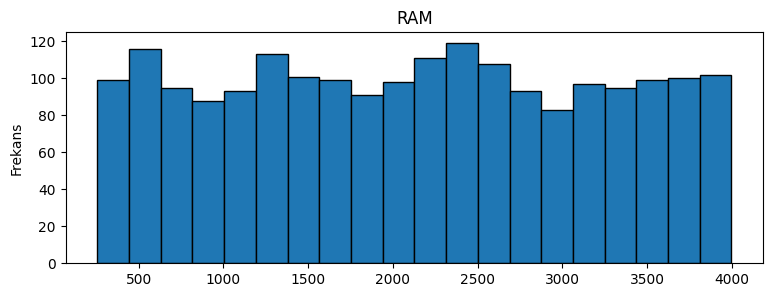

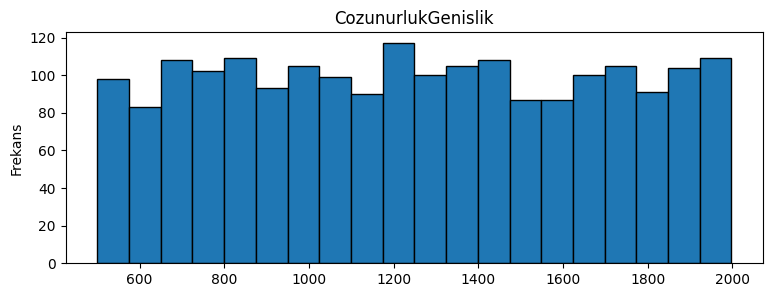

In [27]:
sayisal = ["BataryaGucu", "RAM", "CozunurlukGenislik"]
for i in sayisal:
    hist(i)

In [28]:
# Standardizasyon ve Normalizasyon
scaler = StandardScaler()
data["RAM_Standardized"] = scaler.fit_transform(data[["RAM"]])

min_max_scaler = MinMaxScaler()
data["RAM_Normalized"] = min_max_scaler.fit_transform(data[["RAM"]])

In [29]:
# D'Agostino K² Testi ile Normal Dağılım Kontrolü
stat, p = normaltest(data["RAM_Normalized"])
print(f"D'Agostino K² Testi: p-değeri = {p}")
if p < 0.05:
    print("Veri normal dağılmıyor (Başarısız)")
else:
    print("Veri normal dağılıyor (Başarılı)")

D'Agostino K² Testi: p-değeri = 2.258975264795339e-288
Veri normal dağılmıyor (Başarısız)


In [34]:
# Dönüştürme Türleri Karşılaştırma
data["RAM_BoxCox"], _ = boxcox(data["RAM"] + 1)  # BoxCox için pozitif değerler gereklidir
data["RAM_Log"] = np.log1p(data["RAM"])  # Log dönüşümü
data["RAM_Sqrt"] = np.sqrt(data["RAM"])  # Karekök dönüşümü

In [35]:
# Regresyon Modeli Kurulumu ve Testi
X = data.drop(columns=["FiyatAraligi"])
y = data["FiyatAraligi"]

In [36]:
# Kategorik değişkenleri sayısala dönüştürme
X = pd.get_dummies(X, drop_first=True)

In [37]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Model eğitimi ve test işlemi
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
# Model Performansı
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R^2: {r2}")

MSE: 1.2372512961087956e-26, R^2: 1.0


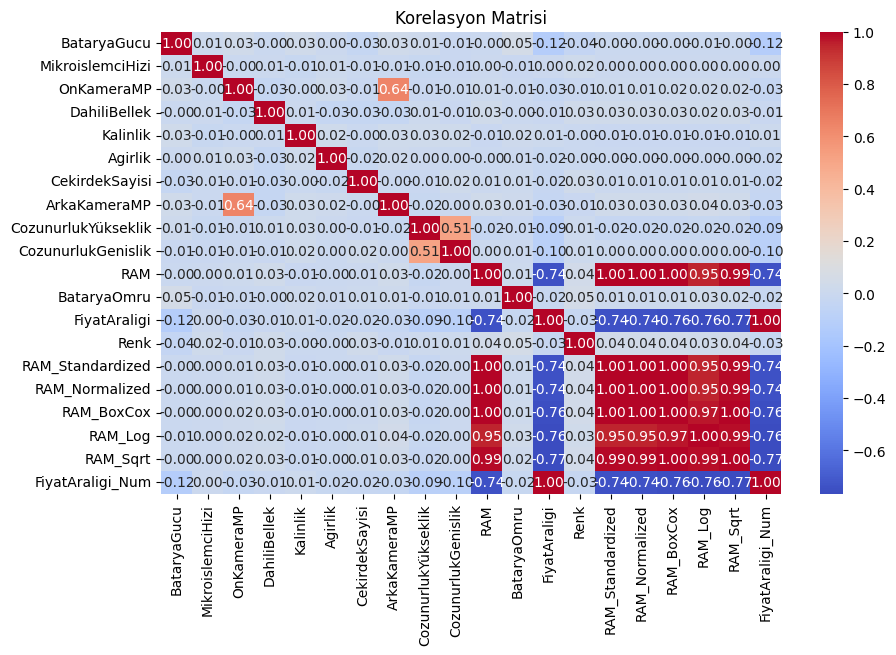

In [40]:
# Korelasyon Matrisi ve Isı Haritası
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasyon Matrisi")
plt.show()